# Matplotlib创建散点图

**一图胜千言，使用Python的matplotlib库，可以快速创建高质量的图形。**

用matplotlib生成基本图形非常简单，只需要几行代码，但要创建复杂的图表，需要调用更多的命令和反复试验，这要求用户对matplotlib有深入的认识。

蜂鸟数据推出一个新的系列教程：Python数据可视化，针对初级和中级用户，将理论和示例代码相结合，分别使用matplotlib, seaborn, plotly等工具实现可视化。

**本文主题是如何用Matplotlib创建散点图(scatter plot)。**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 尝试'fivethirtyeight'主题
plt.style.use("fivethirtyeight")

## 1. 基础散点图

散点图通用用于探索两个连续性变量的关系，在探索性数据分析(EDA)阶段非常重要。

ax.plot()除了可以创建曲线图，还可以创建散点图，只需要提供点的样式即可，默认为实心圆。

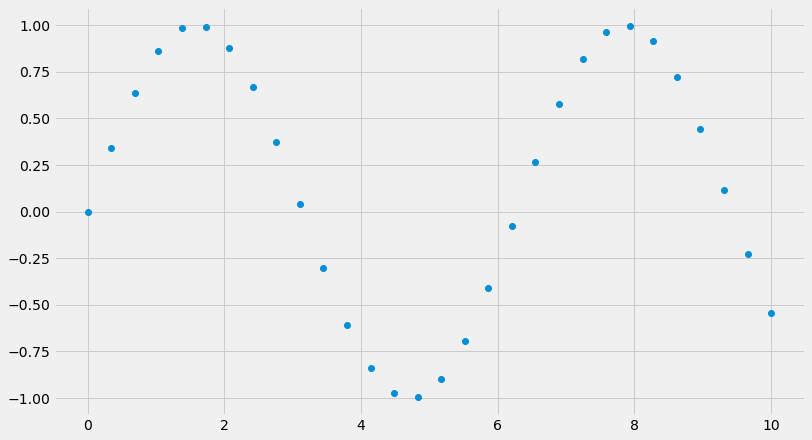

In [2]:
# 准备数据
x = np.linspace(0, 10, 30)
y = np.sin(x)

# 调用ax.plot()创建散点图，跟创建曲线图一样
# 第3个(可选)参数'fmt'控制几何图形，'-'代表实线，'o'代表点(实心圆)
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y, "o")

## 2. 用线将点连接在一起

曲线和散点可以结合使用，这往往会得到更好的可视化效果。曲线图能显示趋势，散点图则体现变量的关系。ax.plot()可以同时创建曲线和散点，此外还可以通过'markersize','markerfacecolor'等参数控制散点的样式。

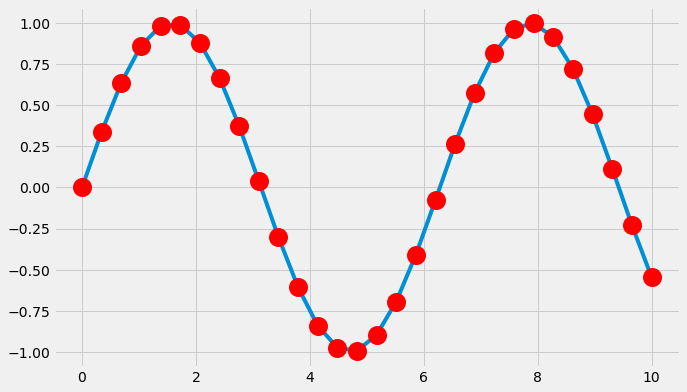

In [3]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(10, 6.18))
ax.plot(
    x, y, "-o",  # 同时创建曲线和散点
    markersize=15,  # 控制点的大小
    linewidth=4,  # 控制线的大小
    markerfacecolor="red",  # 控制圆圈填充的颜色
    markeredgecolor="red",  # 控制圆圈边缘的颜色
    markeredgewidth=4  # 控制圆圈边缘的大小
)

## 3. 散点类型

有很多可供选择的类型，除了实心圆外，还有交叉，正三角，倒三角等，我们尝试一些最常用的类型。

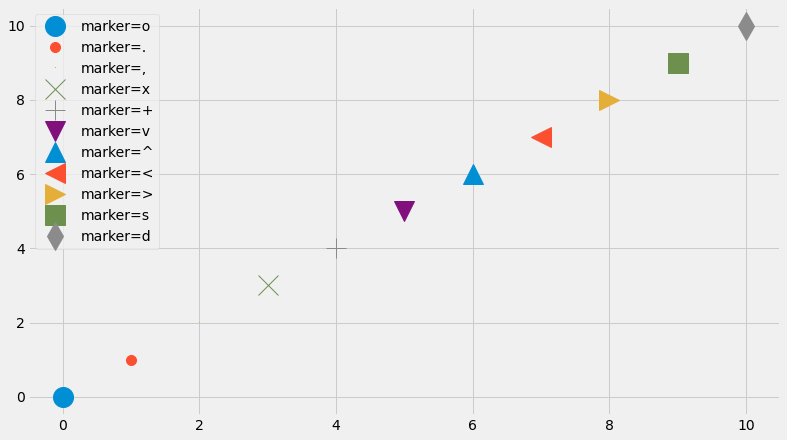

In [4]:
# matplotlib用特殊字符表示散点类型
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

x = np.arange(len(markers))

fig, ax = plt.subplots(figsize=(12, 7))

for i, marker in enumerate(markers):
    ax.plot(x[i], x[i], marker, label=f"marker={marker}", markersize=20)
    
ax.legend()

## 4. 调用scatter接口创建散点图

除了ax.plot外，ax.scatter也可以创建散点图，两者的不同之处在于ax.scatter接口更加灵活，能够控制每个点的样式，包括点的大小，填充颜色，边缘颜色等。

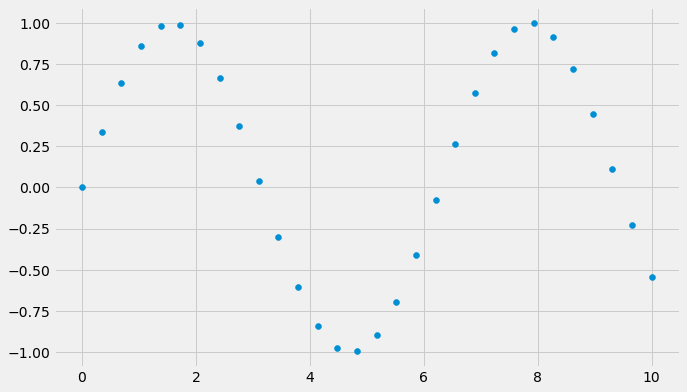

In [5]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(10, 6.18))
ax.scatter(x, y, marker="o")  # 通过设置marker参数来调整样式

ax.scatter在创建复杂的散点图时非常有用，假设我们想加入第三个维度，对数值变量x,y进行分类，这时可以将分类变量的水平值映射为不同颜色和大小。

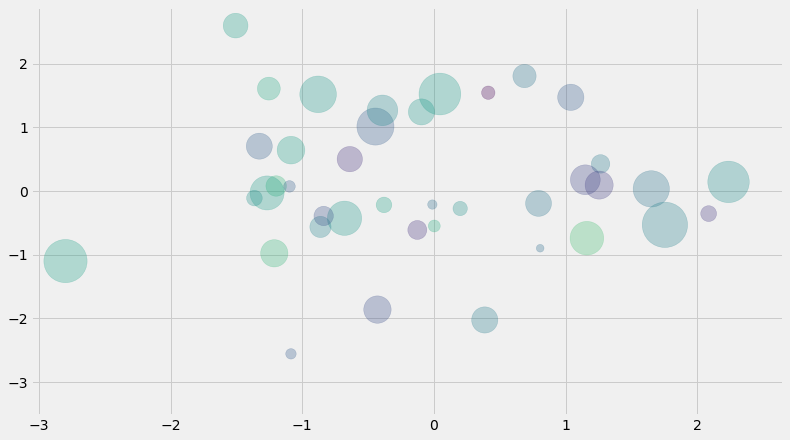

In [7]:
# 设置随机数种子
np.random.seed(123)

# 虚拟数据集
x = np.random.randn(100)
y = np.random.randn(100)

# 每个点使用不同的颜色，生成一个代表颜色的数组，传递给参数'c'
colors = np.random.randn(100)

# 每个点使用不同的大小，生成一个代表大小的数组，传递给参数's'
sizes = 1000*np.random.randn(100)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap="viridis")

让我们举一个更加贴近现实的例子。散点图通常用于探索两个数值变量的关系，例如是否存在线性相关，如果是可以引入线性回归模型。当加入第三个维度时(通常是分类变量)，常用方法是将分类变量的标签映射为不同颜色。

为了说明这一点，我们使用iris数据集，包含150个观测值和4个特征（分别记录花的不同属性），目标变量是预测花的类别。

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


探索patal_length(花瓣长度)和petal_width(花瓣宽度)之间的关系，加入第三个维度'target'，观察在每种类别下长度和宽度的关系。

[Text(0, 0.5, 'petal width(cm)'),
 Text(0.5, 0, 'petal length(cm)'),
 Text(0.5, 1.0, 'Petal Width vs Petal Length')]

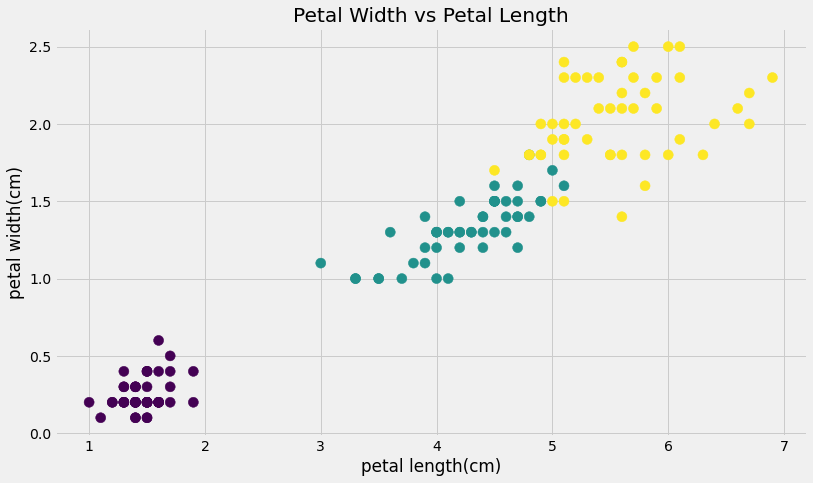

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))

# 将分类变量传递给参数'c'，将类别映射为不同颜色，可以设置调色板cmap
# 改变类别的颜色
ax.scatter(iris_df["petal length (cm)"], iris_df["petal width (cm)"],
           c=iris_df["target"], cmap="viridis", s=100)

ax.set(title="Petal Width vs Petal Length",
       xlabel="petal length(cm)",
       ylabel="petal width(cm)")

## 5. 结论

本文介绍了如何用matplotlib创建散点图，包括ax.plot()和ax.scatter()两种方法，以及如何调整散点的样式。

初学者应该使用哪个接口？答案取决于数据集的大小，如果数据集只有几百个观测值，并且希望控制每个点的样式，建议使用ax.scatter。如果数据集包含上万个观测值，ax.plot比ax.scatter的效率更高，因为后者可能会对给个点进行单独的渲染（例如采用不同的颜色或大小），导致效率下降。